In [90]:
import warnings # ignorando warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### 1. Importar e Preparar os Dados

In [49]:
url = 'https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-mar-21/main/dados_aluguel_sao_paulo_preprocessado.csv'

In [50]:
data = pd.read_csv(url)
data.head()

,zona,area,quarto,aluguel
0,norte,50.0,2.0,1150
1,norte,76.0,3.0,1480
2,norte,30.0,1.0,800
3,norte,80.0,3.0,1180
4,norte,70.0,2.0,1300


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1341.0,112.697987,259.503149,1.0,48.0,67.0,106.0,7800.0
quarto,1273.0,2.106834,0.882869,1.0,1.0,2.0,3.0,5.0
aluguel,1344.0,4396.404762,29225.842756,299.0,1500.0,2200.0,3577.5,870000.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     1344 non-null   object 
 1   area     1341 non-null   float64
 2   quarto   1273 non-null   float64
 3   aluguel  1344 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 42.1+ KB


In [51]:
train, test = train_test_split(data, test_size=0.25, random_state=123, stratify=data['zona'])

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 221 to 904
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     1008 non-null   object 
 1   area     1005 non-null   float64
 2   quarto   948 non-null    float64
 3   aluguel  1008 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 39.4+ KB


In [26]:
train['zona'].value_counts()

oeste    252
leste    252
norte    252
sul      252
Name: zona, dtype: int64

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 419 to 1159
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     336 non-null    object 
 1   area     336 non-null    float64
 2   quarto   325 non-null    float64
 3   aluguel  336 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


In [28]:
test['zona'].value_counts()

oeste    84
leste    84
norte    84
sul      84
Name: zona, dtype: int64

In [29]:
test.head()

,zona,area,quarto,aluguel
419,sul,52.0,2.0,2020
366,sul,40.0,1.0,1502
618,sul,47.0,2.0,1610
653,sul,115.0,3.0,3000
248,norte,40.0,1.0,2500


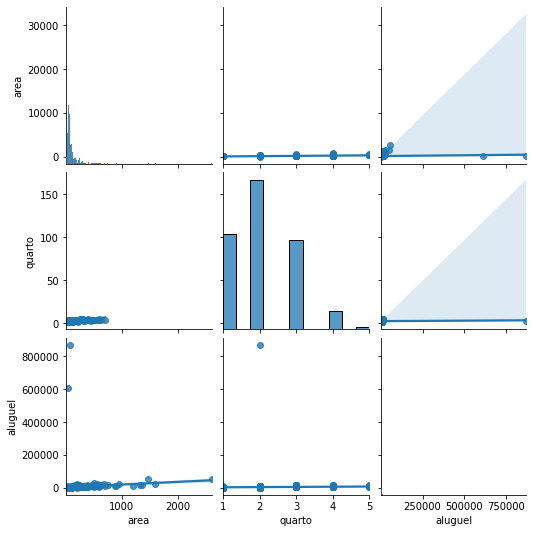

In [30]:
sns.pairplot(train, kind='reg');

In [74]:
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)
train['quarto']=train['quarto'].apply(np.log1p)

In [75]:
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)
test['quarto']=test['quarto'].apply(np.log1p)

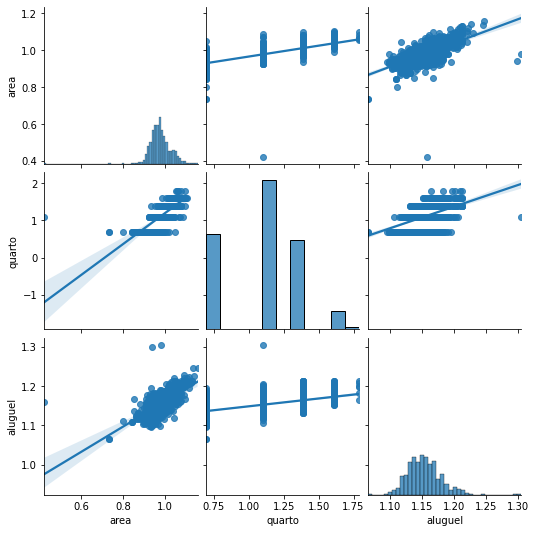

In [36]:
sns.pairplot(train, kind='reg');

In [54]:
X_cols = ['zona', 'area', 'quarto']
y_col = ['aluguel']

In [55]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [56]:
X_train.head()

,zona,area,quarto
221,norte,4.007333,1.098612
956,leste,4.406719,1.386294
721,leste,4.454347,1.098612
604,sul,4.369448,1.386294
119,norte,4.875197,NaN


In [57]:
# Tratar colunas categoricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [58]:
X_train.head()

,area,quarto,zona_leste,zona_norte,zona_oeste,zona_sul
221,4.007333,1.098612,0,1,0,0
956,4.406719,1.386294,1,0,0,0
721,4.454347,1.098612,1,0,0,0
604,4.369448,1.386294,0,0,0,1
119,4.875197,NaN,0,1,0,0


In [59]:
# Tratar valores ausentes
# Importante: Usar informações do conjunto de treino
train_medians = X_train.median()
X_train = X_train.fillna(train_medians)
X_test = X_test.fillna(train_medians)

In [60]:
X_train.head()

,area,quarto,zona_leste,zona_norte,zona_oeste,zona_sul
221,4.007333,1.098612,0,1,0,0
956,4.406719,1.386294,1,0,0,0
721,4.454347,1.098612,1,0,0,0
604,4.369448,1.386294,0,0,0,1
119,4.875197,1.098612,0,1,0,0


## 2. Machine Learning
### 2.1 Definição de Métrica
Métricas para regressão:
- Mean Absolute Error
- Mean Squared Error
- R2 Score
- Root Mean Squared Error



### 2.2 Modelo Dummy e KNN como Base

In [76]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test) # esse score é o R²

-0.0001003508810866194

In [77]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.5169350412052822

In [63]:
y_pred = neigh.predict(X_test)

In [64]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.values)**2))

0.4732437657205557

In [65]:
# Mean Squared Error
np.mean((y_pred-y_test.values)**2)

0.22395966179337223

In [66]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.3621253262285776

In [67]:
# R2 Score
r2_score(y_test, y_pred)

0.5169350412052822

## 3. Triagem com Outros Modelos

In [68]:
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.6093762248236132

In [78]:
regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor()] # se quiser, adicionar uma vírgula e mais regressores

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.873371877020912
Test score 0.1844270573692005
Treinando RandomForestRegressor
Train score 0.8328263731510337
Test score 0.43045597574612593
Treinando MLPRegressor
Train score 0.5406031540930618
Test score 0.6163056820654133
Treinando XGBRegressor
[17:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.6216956272925864
Test score 0.6031620068446988


In [70]:
len(X_train)//3

336

In [71]:
X1=X_train[:336]
X2=X_train[336:2*336]
X3=X_train[2*336:]

In [81]:
# Repetindo com score de validação cruzada

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor()]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=3)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.873371877020912
Validation score [-0.06819985  0.31659612  0.33435949]
Test score 0.1899433979508297
Treinando RandomForestRegressor
Train score 0.8284090604117651
Validation score [0.38474254 0.43045962 0.42357863]
Test score 0.47629113576454135
Treinando MLPRegressor
Train score 0.5476456331427733
Validation score [0.48011121 0.54279619 0.53724937]
Test score 0.6213914423324367
Treinando XGBRegressor
[17:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.6216956272925864
Validatio

In [84]:
# Calibração de modelo

parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb, parameters, scoring='r2',n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=1,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                          'max_depth': [3, 4, 5, 6, 7, 8],
          

In [85]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [86]:
reg = gs.best_estimator_

In [89]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)

print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[17:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.5789568757784442
Validation score [0.4992717  0.51989244 0.50999327]
Test score 0.6060030969986206


In [91]:
# salvando para um arquivo pickle
with open('xgboost_reg.pkl', 'wb') as f:
    pickle.dump(reg, f)

## carregando o arquivo do modelo
#with open('xgboost_reg.pkl', 'rb') as f:
#    clf = pickle.load(f)